## EDA and Preprocessing - AUTOMOBILE CARS
Basic EDA - Info, shape

Handling Missing Values

Handling Outliers

Handling Skewness

Categorical Data Encoding

Data Normalization or Scaling

Feature Engineering

In [18]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# data load
# c:\Users\hp\Desktop\class\Car_sales.csv
df = pd.read_csv(r"Car_sales.csv")
df.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [20]:
# show basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [21]:
# check null value
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [22]:
# summarize numerical columns
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


df.dtypes

In [23]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [24]:
# FIND MEAN
df["__year_resale_value"].mean()

np.float64(18.07297520661157)

In [25]:
df["__year_resale_value"] = df["__year_resale_value"].fillna(df["__year_resale_value"].mean() ) # FILL NULL

In [26]:
df["__year_resale_value"]

0      16.360000
1      19.875000
2      18.225000
3      29.725000
4      22.255000
         ...    
152    18.072975
153    18.072975
154    18.072975
155    18.072975
156    18.072975
Name: __year_resale_value, Length: 157, dtype: float64

In [27]:
df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64

In [28]:
# remove null value
df.dropna(axis=0, inplace=True)


In [29]:
df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

### Handling Outliers

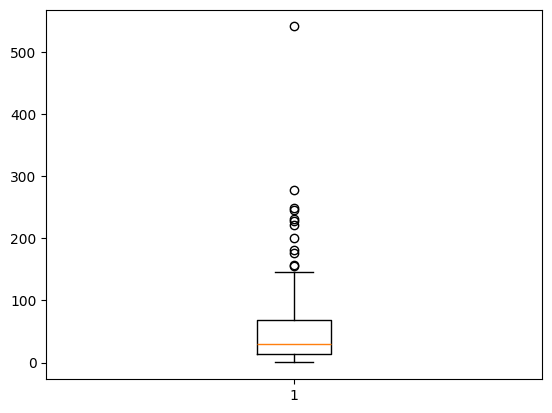

In [30]:
df["Sales_in_thousands"]
# visualize data
plt.boxplot(df["Sales_in_thousands"])
plt.show()

In [31]:
# condition based remove  using reasign 
df = df[df["Sales_in_thousands"]<500]

In [32]:
df[df["Sales_in_thousands"]>250]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
52,Ford,Explorer,276.747,16.64,Car,31.93,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0,4/25/2012,87.635496


In [33]:
# drop single value row wise 
df.drop(index=56,axis=0).head(60)

KeyError: '[56] not found in axis'

<Axes: xlabel='Sales_in_thousands', ylabel='Count'>

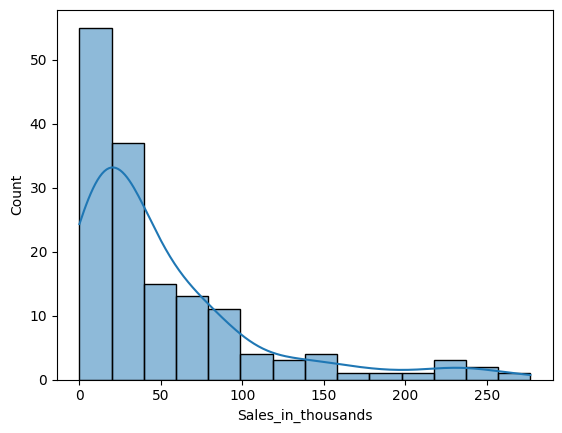

In [21]:
# distributions 
import seaborn as sns

sns.histplot(df["Sales_in_thousands"], kde = True)

In [39]:
# check the skewness of columns 
df["Sales_in_thousands"].skew()

np.float64(2.00733904538534)

<Axes: xlabel='Sales_in_thousands', ylabel='Count'>

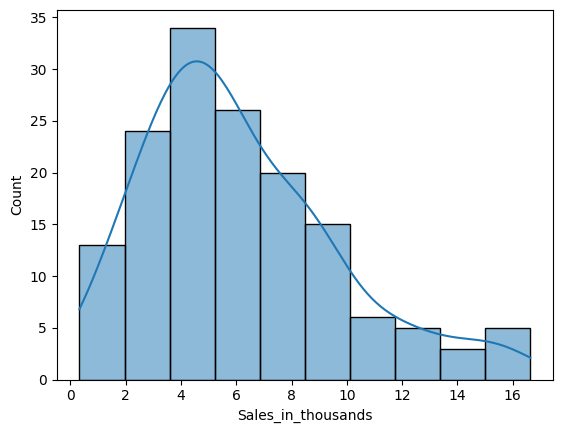

In [22]:
sns.histplot(np.sqrt(df["Sales_in_thousands"]), kde = True)

In [41]:
# check the skewness of columns after apply the root functions 
np.sqrt(df["Sales_in_thousands"]).skew()

np.float64(0.9034776849206524)

In [49]:
df["Sales_in_thousands"].dtype

dtype('float64')

In [ ]:
df =pd.read_csv("Car_sales.csv")

In [23]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [ ]:
cat_cols2=[]

for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols2.append(col)


In [48]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']

In [25]:
#code to seprate numeric and categorical columns and store in DF.
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

num_cols = [col for col in df.columns if df[col].dtype != 'object']


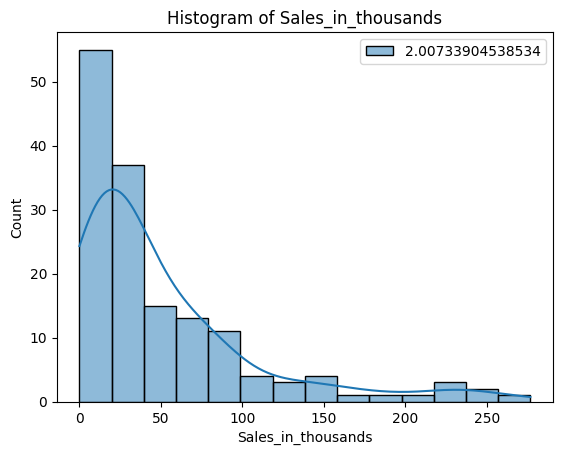

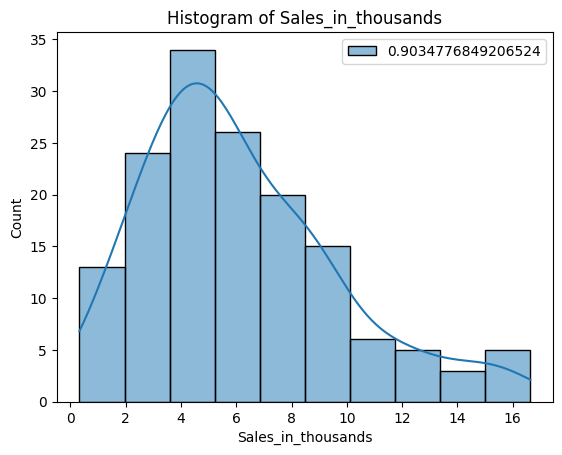

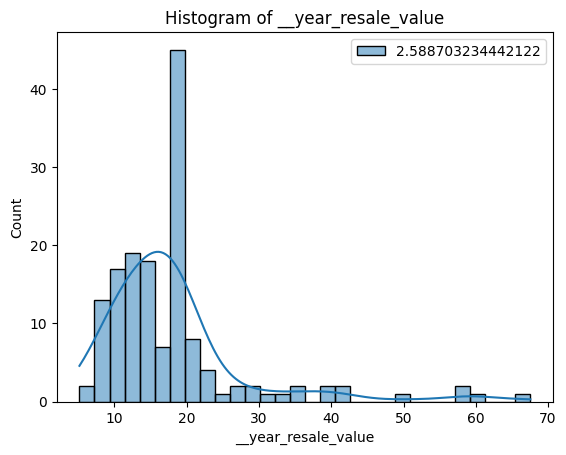

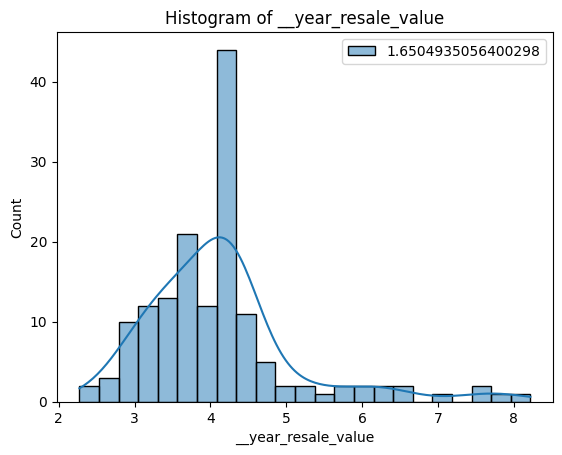

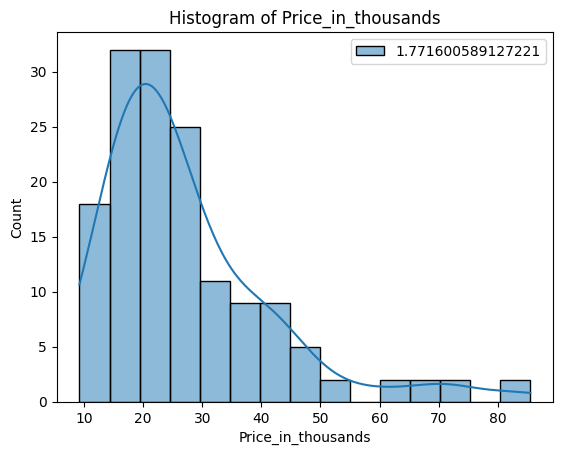

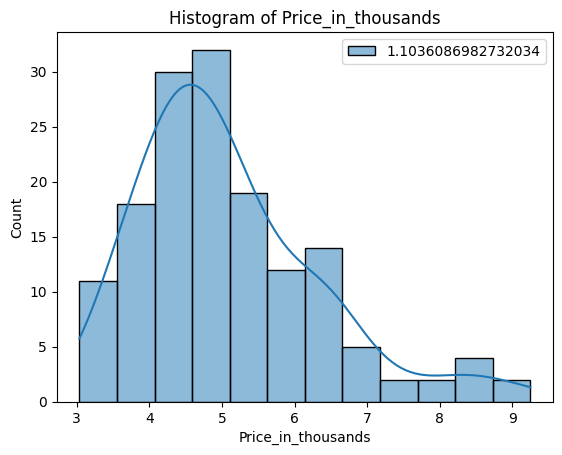

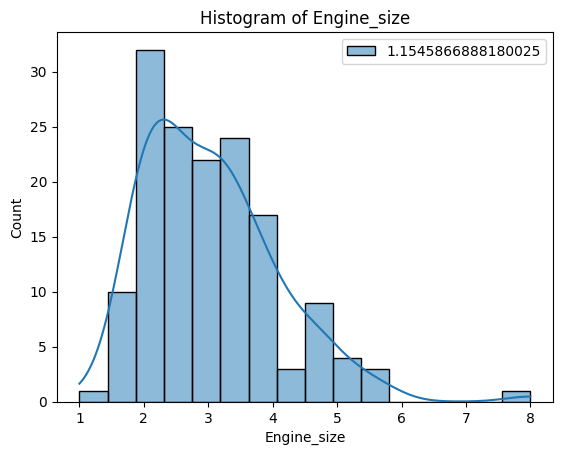

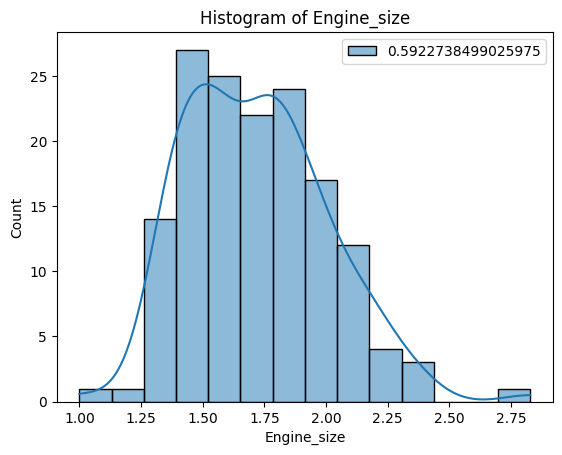

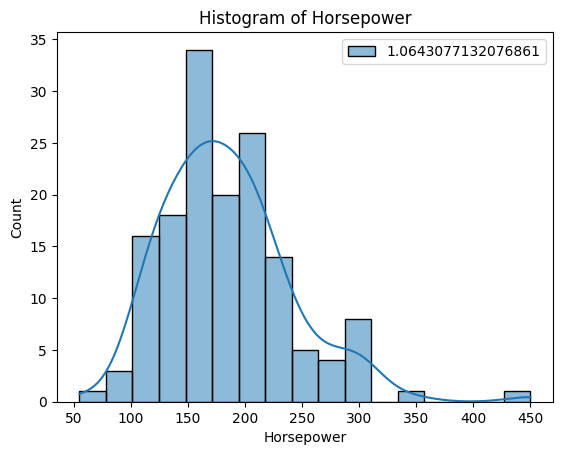

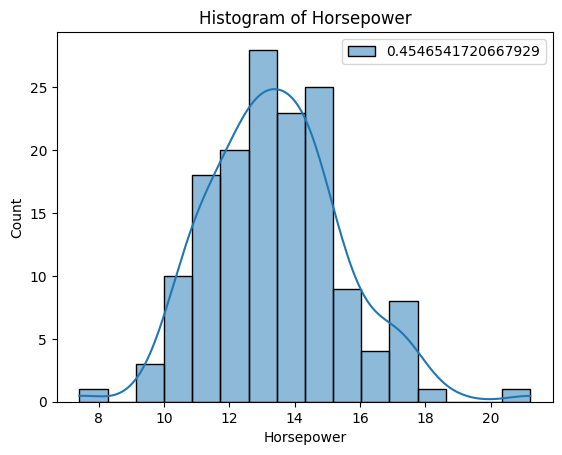

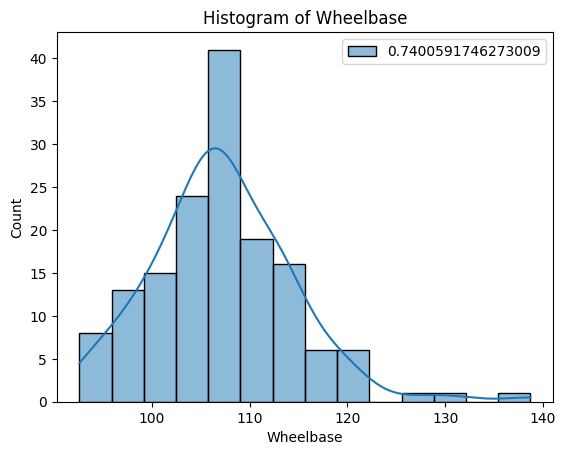

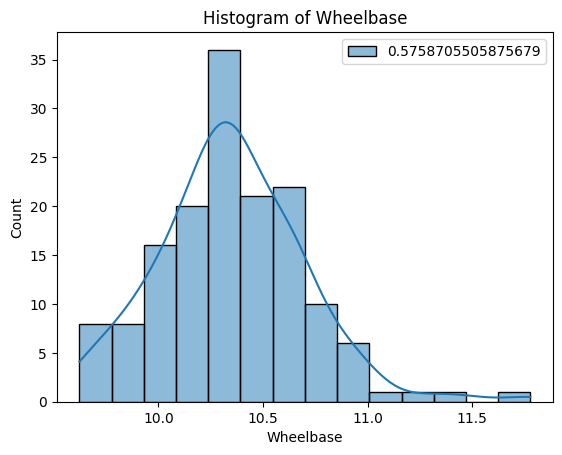

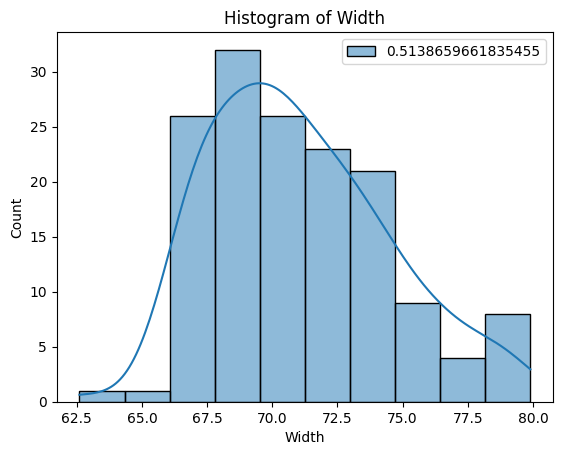

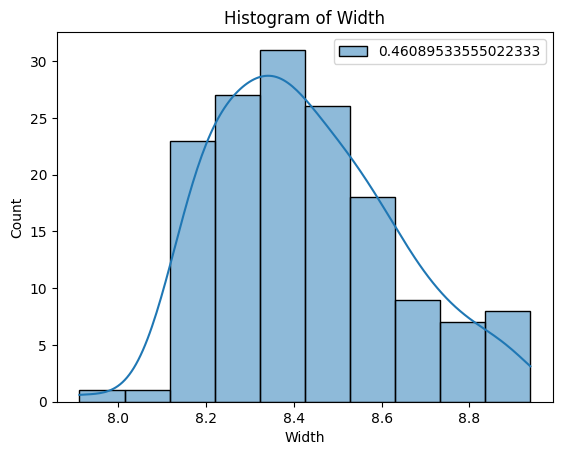

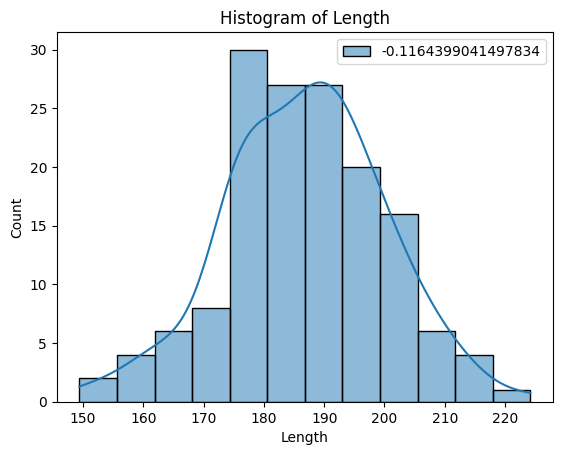

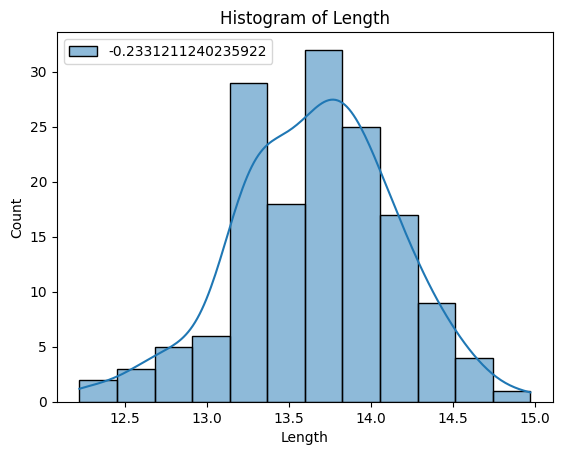

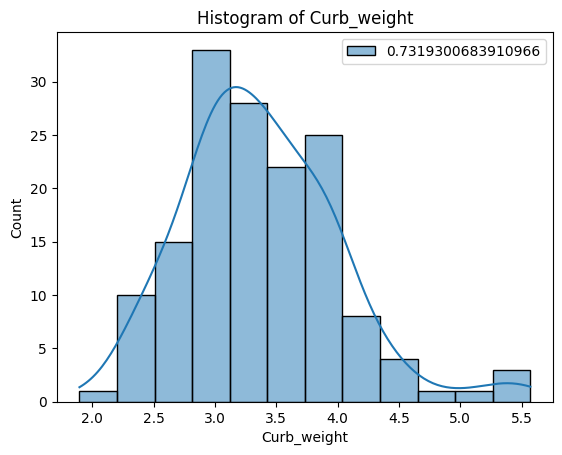

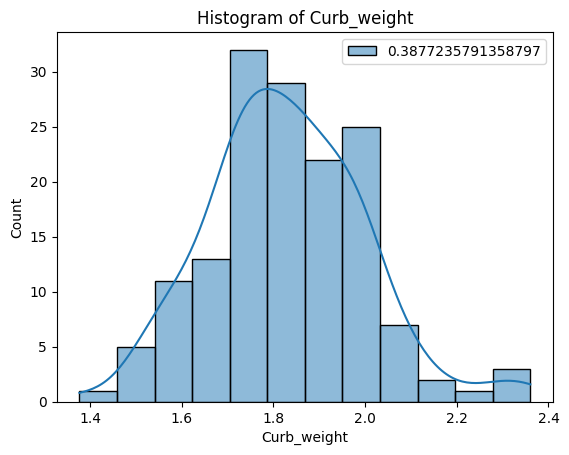

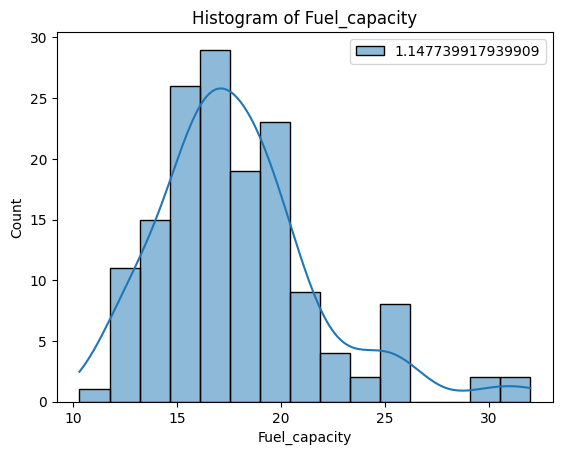

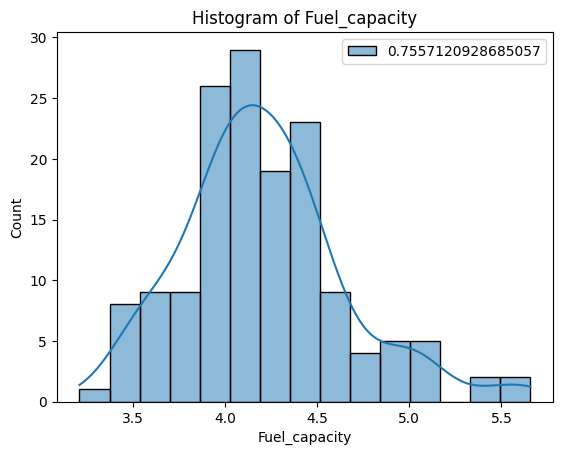

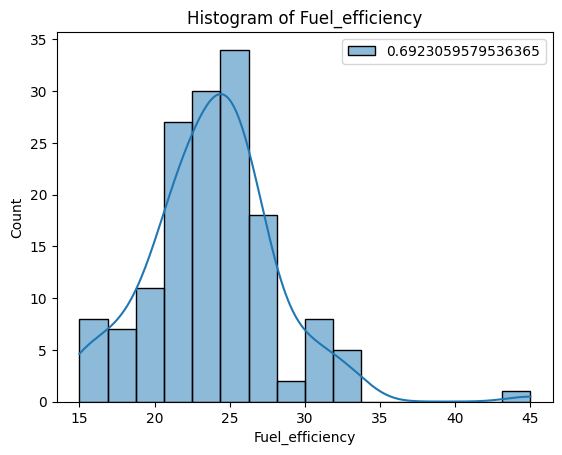

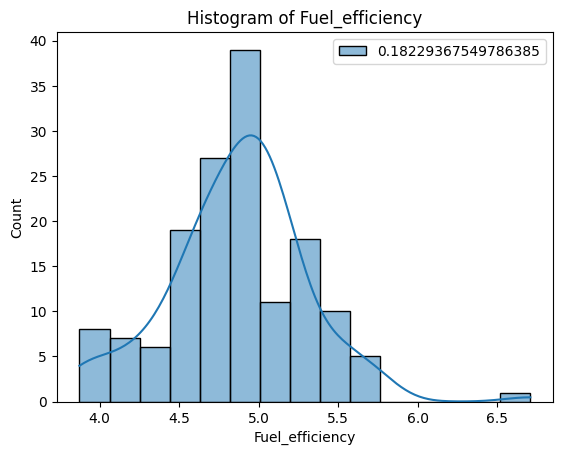

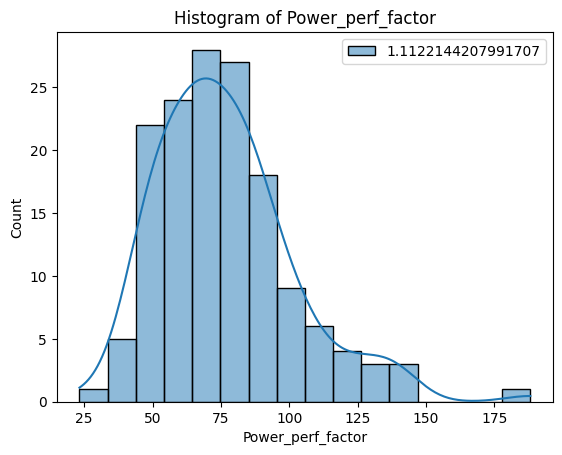

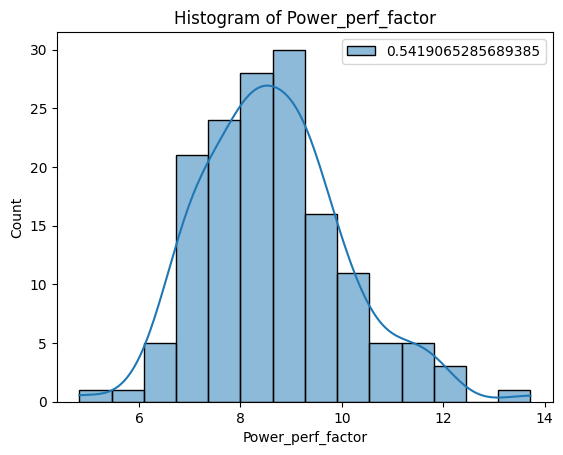

In [32]:
for i in num_cols:
    sns.histplot(df[i], kde = True, label= df[i].skew())
    plt.title('Histogram of '+ str(i))
    plt.legend()
    plt.show()
    plt.title('Histogram of '+ str(i))
    sns.histplot(np.sqrt(df[i]), kde = True,label= np.sqrt(df[i]).skew())
    plt.legend()
    plt.show()

In [33]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360000,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875000,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725000,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255000,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555000,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,18.072975,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,18.072975,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,18.072975,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,18.072975,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


## Data Normalization or Scaling

In [ ]:

for i in df["Sales_in_thousands"]:
    print(i)
    print((i-df["Sales_in_thousands"].min())/(df["Sales_in_thousands"].max()-df["Sales_in_thousands"].min()))

In [ ]:
# pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler ,StandardScaler, RobustScaler
scale =MinMaxScaler()
scale.fit_transform(df[["Sales_in_thousands"]]) 

In [ ]:
st_scale =StandardScaler()
st_scale.fit_transform(df[["Sales_in_thousands","Price_in_thousands"]])

In [ ]:
st_scale =RobustScaler()
st_scale.fit_transform(df[["Sales_in_thousands","Price_in_thousands"]])

# 4.5 Feature Encoding

Feature encoding is the process of turning categorical data in a dataset into numerical data. It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

Here, we will use One Hot Encoding for the columns - Manufacturer, Vehicle_type.

In [22]:
df["Vehicle_type"].nunique()
df["Vehicle_type"].unique()

array(['Passenger', 'Car'], dtype=object)

In [ ]:
# Using pandas to create
encoded_dataset = pd.get_dummies(data = df, columns = ['Manufacturer', 'Vehicle_type'])
encoded_dataset

In [17]:
df = pd.read_csv("Car_sales.csv")

In [18]:
# using sklearn
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

encoder = OneHotEncoder()

encoded = encoder.fit_transform(df[['Manufacturer']]).toarray()

pd.DataFrame(encoded,columns=encoder.get_feature_names_out()).head(100)

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,...,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
encoder.get_feature_names_out()

array(['Manufacturer_Acura', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac',
       'Manufacturer_Chevrolet', 'Manufacturer_Chrysler',
       'Manufacturer_Dodge', 'Manufacturer_Ford', 'Manufacturer_Honda',
       'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac',
       'Manufacturer_Porsche', 'Manufacturer_Saab', 'Manufacturer_Saturn',
       'Manufacturer_Subaru', 'Manufacturer_Toyota',
       'Manufacturer_Volkswagen', 'Manufacturer_Volvo'], dtype=object)

In [20]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [ ]:
# 2.LabelEncoder --> Nominal 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit_transform(df[['Manufacturer']])

In [34]:
# OrdinalEncoder  --> Ordinal 
from sklearn.preprocessing import OrdinalEncoder

df1 = pd.DataFrame({"qualification": ["HS", "PG","GR", "HS", "PhD", "HS", "PG"]})
encoder = OrdinalEncoder(categories = [["HS", "GR", "PG", "PhD"]])

encoder.fit_transform(df[['qualification']])

KeyError: "None of [Index(['qualification'], dtype='object')] are in the [columns]"

In [ ]:
df1

NameError: name 'df1' is not defined

In [33]:
### Creating a filter_dataset
d1 = df[['Sales_in_thousands', '__year_resale_value', 'Fuel_capacity', 'Fuel_efficiency',"Horsepower","Price_in_thousands"]]
d1.corr()

,Sales_in_thousands,__year_resale_value,Fuel_capacity,Fuel_efficiency,Horsepower,Price_in_thousands
Sales_in_thousands,1.000000,-0.279034,0.086540,-0.016764,-0.197756,-0.304734
__year_resale_value,-0.279034,1.000000,0.325567,-0.399880,0.769081,0.953840
Fuel_capacity,0.086540,0.325567,1.000000,-0.801512,0.499907,0.423282
Fuel_efficiency,-0.016764,-0.399880,-0.801512,1.000000,-0.611332,-0.492157
Horsepower,-0.197756,0.769081,0.499907,-0.611332,1.000000,0.839744
Price_in_thousands,-0.304734,0.953840,0.423282,-0.492157,0.839744,1.000000


In [ ]:
# plt.figure(figsize = (10, 10))
import seaborn as sns
heatmap = sns.heatmap(d1.corr(), annot = True)

In [ ]:
df

## EDA 

In [1]:
# data 
# clean 
# transform
# clean data and save for ml models 
# then apply models


NameError: name 'df' is not defined

### load data

Manufacturer           157
Model                  157
Sales_in_thousands     157
__year_resale_value    121
Vehicle_type           157
Price_in_thousands     155
Engine_size            156
Horsepower             156
Wheelbase              156
Width                  156
Length                 156
Curb_weight            155
Fuel_capacity          156
Fuel_efficiency        154
Latest_Launch          157
Power_perf_factor      155
dtype: int64

#### Basic overview of data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

### Data cleaning

1. check duplicates --> remove
2. check missing values( categorical variables, numerical variables)  --> remove/change 
3. check outliers  --> remove/change
4. check data types --> change
5. check for any errors in the data --> remove/change
6. data encoding --> one-hot encoding, label encoding (change categorical variables to numerical variables) 
7. data transformations -->(sqrt,log ,exp, ) , data scaling( data normalization, data standardization)

====================
### Data Preprocessing
Machine model
8. Feature Engineering  --> feature selections
9. model selection
10. model training
11. model evaluation --> metrics, cross-validation, ROC-AUC curve, confusion matrix, precision-rec
12. model tuning --> hyperparameter tuning
13. model deployment --> model saving, model loading, model serving




### Data cleaning

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Car_sales.csv")
df

In [ ]:
df.info()

In [15]:
# duplicate
df.duplicated()  # check for duplicates
df.drop_duplicates(inplace= True) # drop duplicates

# check null values
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [16]:
df["__year_resale_value"].mean()

np.float64(18.07297520661157)

In [17]:
# Replace the null values with the mean of the respective column
  
df["__year_resale_value"] = df["__year_resale_value"].fillna( df["__year_resale_value"].mean())

In [18]:
# drop the values
# df.drop('values', axis=0, inplace=True)

# dropna 
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum()

In [29]:
df.columns
df.columns[0]
df.columns[0]

'Manufacturer'

In [31]:
df[df.columns[0]]

df['Manufacturer'].dtype

dtype('O')

In [ ]:
num_cols = []
cat_cols = []
for  i in df.columns:
    if df[i].dtype !="O":
        print(i, df[i].dtype)
        num_cols.append(i)
    else:
        cat_cols.append(i)

In [40]:
cat_cols

['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']

In [ ]:
# data encoding 
print(df.nunique())

In [51]:
df['Vehicle_type'].unique()

array(['Passenger', 'Car'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
# Fit the encoder to the data and transform it
data = ohe.fit_transform(df[['Vehicle_type']]).toarray()
data

In [55]:
ohe.get_feature_names_out()

array(['Vehicle_type_Car', 'Vehicle_type_Passenger'], dtype=object)

In [ ]:
df1 = pd.DataFrame(data,columns=ohe.get_feature_names_out())
df1

In [ ]:
# change the index number
df = df.set_axis(np.arange(0,152), axis=0)
df

In [ ]:
# for indivisual columns reasign
df["Vehicle_type_Car"] = df1["Vehicle_type_Car"]
df

In [ ]:
# for all columns reassign 
for i in (ohe.get_feature_names_out()):
    print(i)
    df[i] =df1[i]
df

In [102]:
df.drop('Vehicle_type', axis=1, inplace= True)

In [ ]:
df

In [104]:
df.drop('Model', axis=1, inplace= True)

In [105]:
df

,Manufacturer,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Vehicle_type_Car,Vehicle_type_Passenger
0,Acura,16.919,16.360000,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,0.0,1.0
1,Acura,39.384,19.875000,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,0.0,1.0
2,Acura,8.588,29.725000,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,0.0,1.0
3,Audi,20.397,22.255000,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,0.0,1.0
4,Audi,18.780,23.555000,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Volvo,3.545,18.072975,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,0.0,1.0
148,Volvo,15.245,18.072975,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,0.0,1.0
149,Volvo,17.531,18.072975,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,0.0,1.0
150,Volvo,3.493,18.072975,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,0.0,1.0


In [ ]:
data = ohe.fit_transform(df[['Manufacturer']]).toarray()
data

df1 = pd.DataFrame(data,columns=ohe.get_feature_names_out())
df1

# for all columns reassign 
for i in (ohe.get_feature_names_out()):
    df[i] =df1[i]

df.drop('Manufacturer', axis=1, inplace= True)
df

In [ ]:
df.drop('Manufacturer', axis=1, inplace= True)
df

In [109]:
df.drop('Latest_Launch', axis=1, inplace= True)
df

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,16.919,16.360000,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,39.384,19.875000,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.588,29.725000,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.397,22.255000,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.780,23.555000,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,3.545,18.072975,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
148,15.245,18.072975,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149,17.531,18.072975,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
150,3.493,18.072975,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [111]:
df.to_csv("clean_data_for_ml.csv")

In [ ]:
df.dtypes